In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# komponenty do budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data


In [14]:
set_seed(0)

In [15]:
(X_train, y_train) , (X_test, y_test) = load_data()

X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

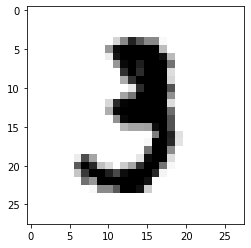

In [17]:
plt.imshow(X_train[10], cmap='gray_r')

In [18]:
y_train[10]

3

In [30]:
model = Sequential()

model.add( Flatten(input_shape=(28,28)) ) # adapter danych zewnętrznych

model.add( Dense(128, activation="relu") )
#model.add( Dropout(0.1))
model.add( Dense(256, activation="relu") )
model.add( Dense(10, activation="softmax") )

model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

result = model.fit(X_train, y_train, epochs=10, validation_split=0.05)

Epoch 1/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.2241 - accuracy: 0.9329 - val_loss: 0.1068 - val_accuracy: 0.9690
Epoch 2/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.1047 - accuracy: 0.9693 - val_loss: 0.0875 - val_accuracy: 0.9800
Epoch 3/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0779 - accuracy: 0.9782 - val_loss: 0.1021 - val_accuracy: 0.9793
Epoch 4/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0633 - accuracy: 0.9821 - val_loss: 0.0958 - val_accuracy: 0.9797
Epoch 5/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9855 - val_loss: 0.1093 - val_accuracy: 0.9797
Epoch 6/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0467 - accuracy: 0.9870 - val_loss: 0.1265 - val_accuracy: 0.9813
Epoch 7/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9897 - val_loss: 0.1173 - val_accuracy:

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
y_pred = np.argmax( model.predict(X_test), axis=-1)

In [33]:
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,973,1,0,1,0,0,3,1,1,0
1,4,1123,3,2,0,0,1,0,2,0
2,5,1,994,9,4,0,1,7,10,1
3,2,0,1,990,0,8,0,3,3,3
4,2,0,4,0,967,0,2,1,0,6
5,2,0,0,4,1,871,6,0,4,4
6,7,2,0,1,10,3,930,0,5,0
7,2,2,5,2,0,0,0,1009,2,6
8,9,0,2,2,2,6,2,5,940,6
9,1,3,0,1,7,3,0,2,2,990


In [34]:
accuracy_score(y_test, y_pred)

0.9787

In [ ]:
# walidacja przesunietego obrazka (grafiki)
np.set_printoptions(linewidth=160)
arr1 =(X_train[20]*255).astype('int')
arr1 = arr1[4:-3 , 3:-5]
arr1

In [ ]:
arr2 = np.hstack( [arr1, np.zeros([21,8]).astype('int')] )
arr2 = np.vstack( [arr2, np.zeros([7,28]).astype('int')] )
arr2

In [50]:
np.argmax( model.predict( (arr2/255).reshape(1, 28, 28) ) )

1